In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-07-24 04:07:35--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.192.208.155, 2600:1409:9800:480::317f, 2600:1409:9800:48e::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.192.208.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  84.4MB/s    in 9.2s    

2024-07-24 04:07:45 (85.8 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [3]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings('ignore')


In [4]:
input_path = []
label = []

for cls in os.listdir('PetImages'):
  for path in os.listdir('PetImages/'+ cls):
    if cls == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", cls, path))

print(input_path[10], label[10])


PetImages/Dog/7758.jpg 1


In [5]:
len(label), len(input_path)

(25002, 25002)

In [6]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label

df = df.sample(frac=1).reset_index(drop = True)
print(df.head())

                   images  label
0  PetImages/Dog/6794.jpg      1
1  PetImages/Dog/5194.jpg      1
2   PetImages/Cat/810.jpg      0
3  PetImages/Cat/1871.jpg      0
4  PetImages/Cat/5297.jpg      0


In [7]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [8]:
df = df[df['images']!="PetImages/Cat/Thumbs.db"]
df = df[df['images']!="PetImages/Dog/Thumbs.db"]
len(df)

25000

In [9]:
import PIL
l = []
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/11702.jpg', 'PetImages/Cat/666.jpg']

In [10]:
df = df[df['images']!="PetImages/Cat/Thumbs.db"]
df = df[df['images']!="PetImages/Dog/Thumbs.db"]
df = df[df['images']!="PetImages/Cat/666.jpg"]
df = df[df['images']!="PetImages/Dog/11702.jpg"]
len(df)

24998

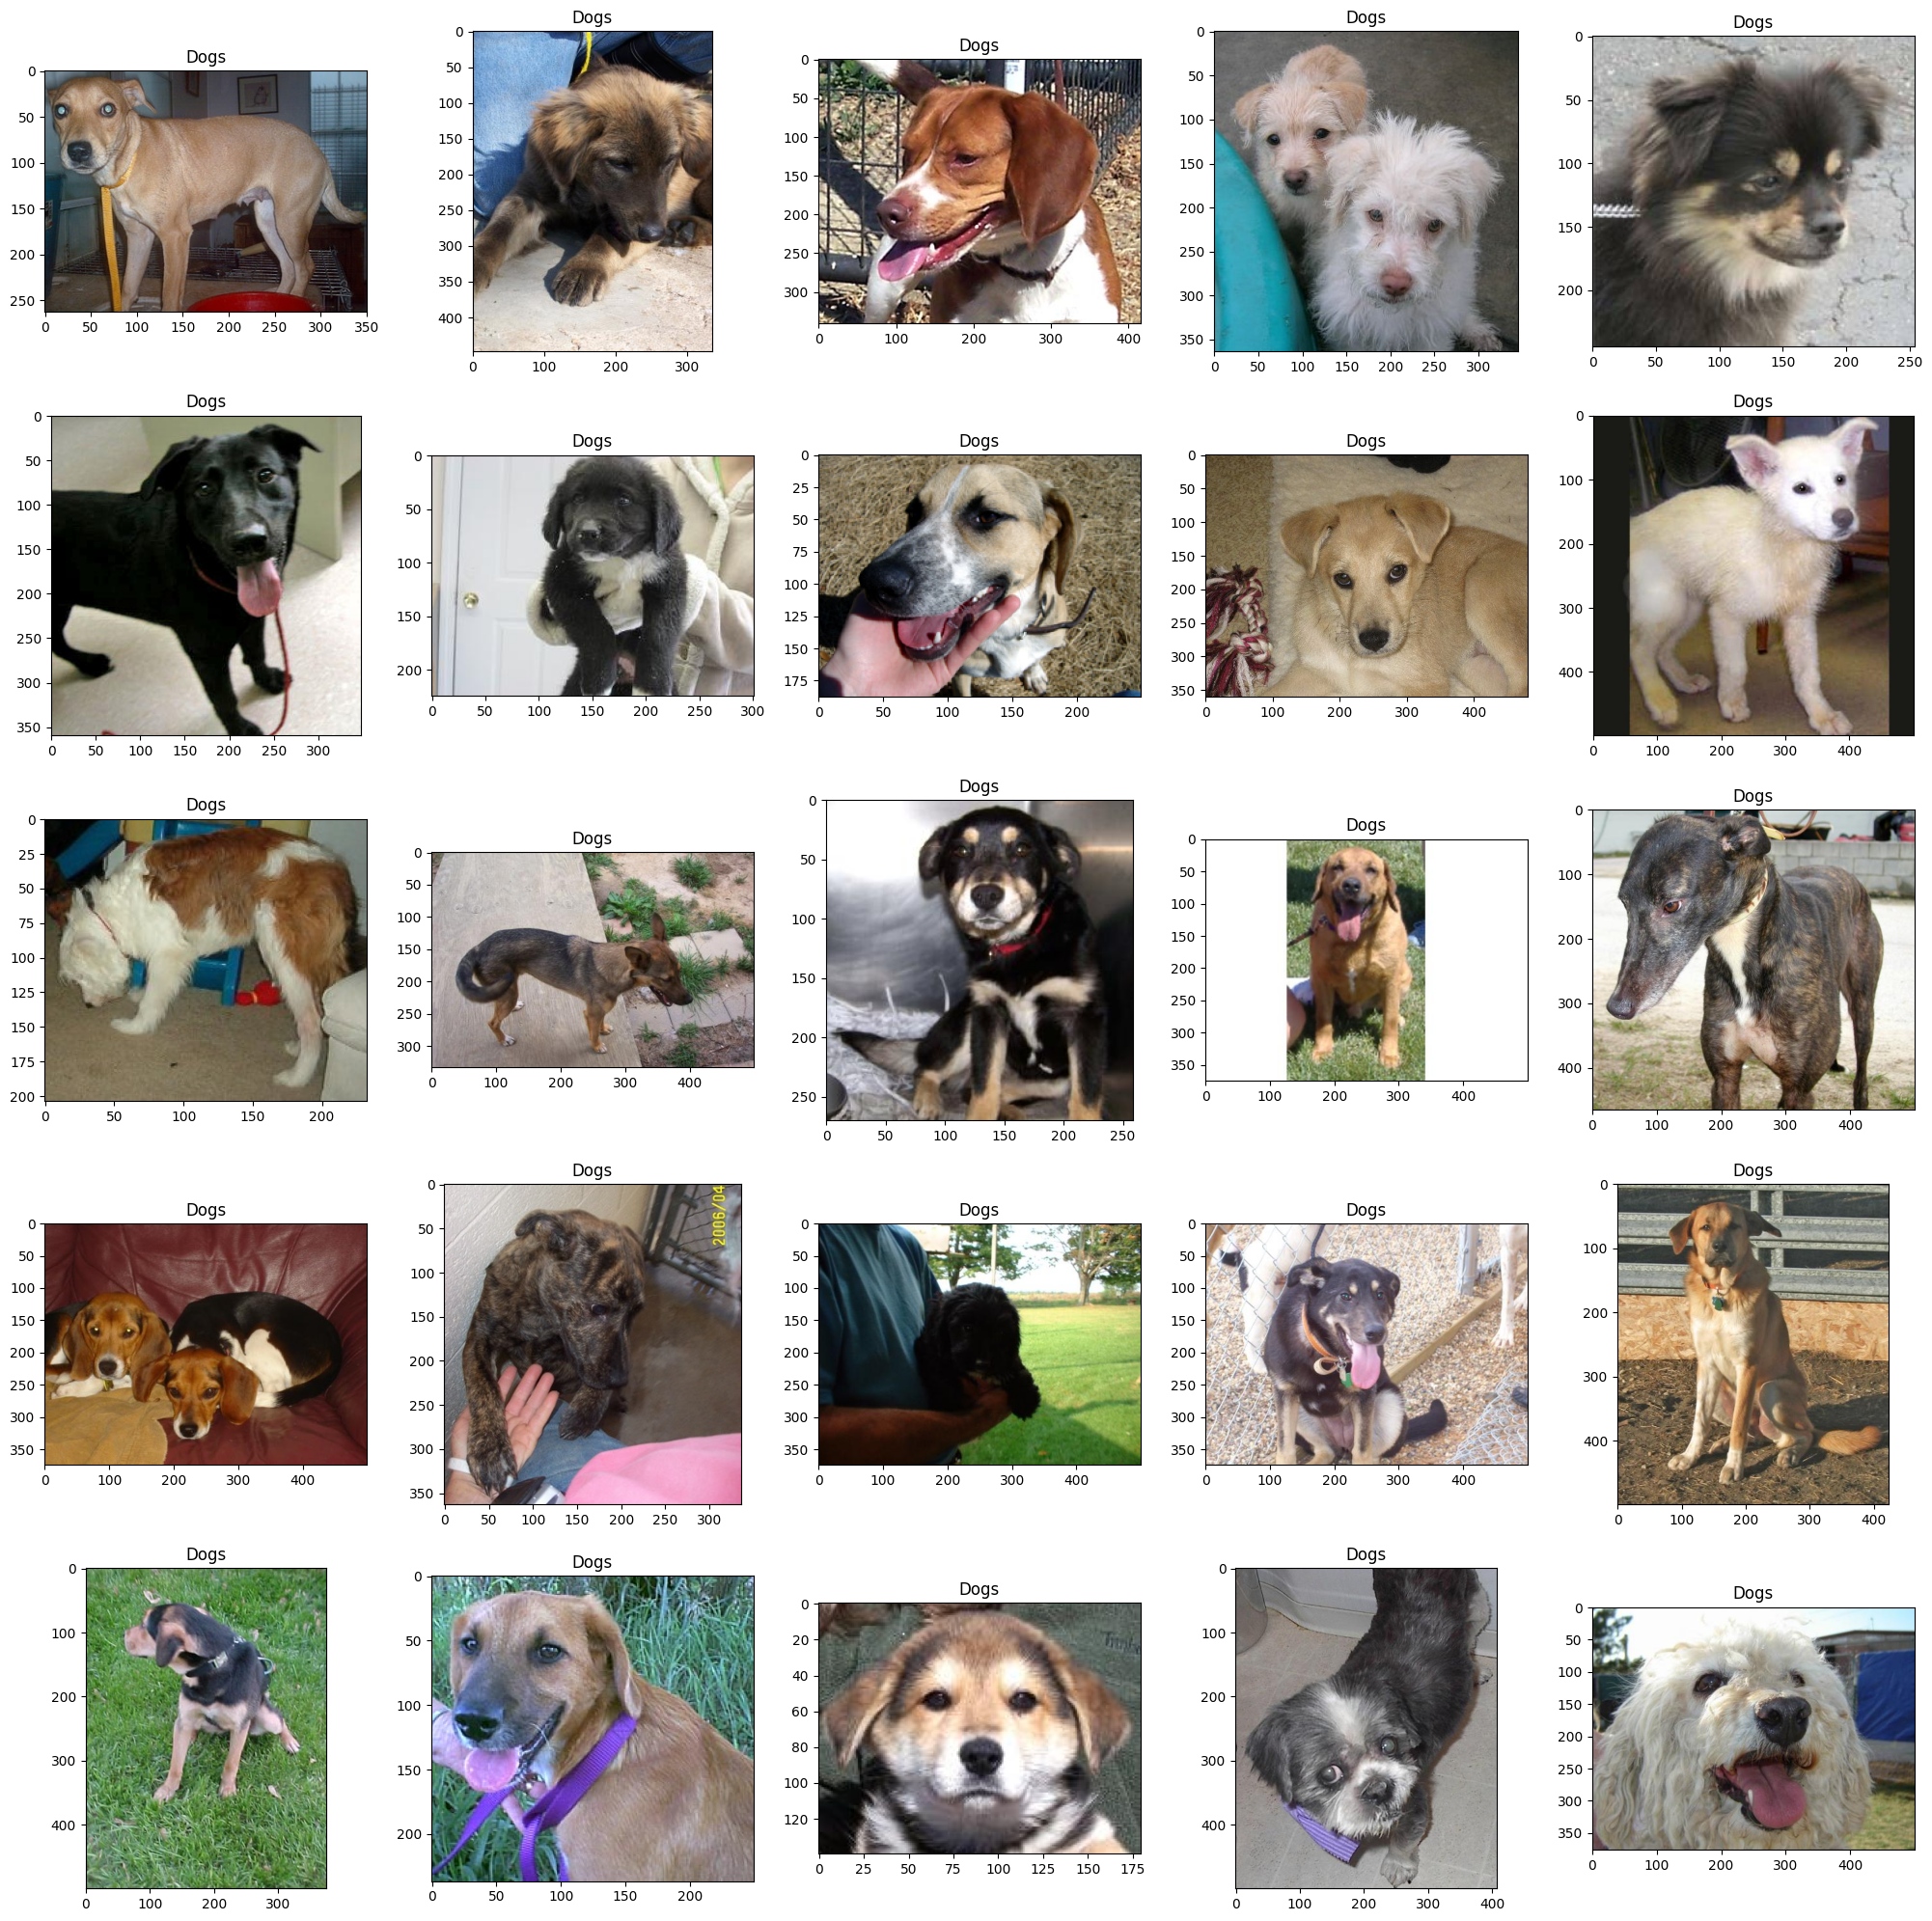

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label'] == 1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')


# print(files)

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label'] == 0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')

In [11]:
df['label'] = df['label'].astype(str)
df.head()

images label
0  PetImages/Dog/6794.jpg     1
1  PetImages/Dog/5194.jpg     1
2   PetImages/Cat/810.jpg     0
3  PetImages/Cat/1871.jpg     0
4  PetImages/Cat/5297.jpg     0

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state= 42)

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, #Normalization of images
    rotation_range=40, #Augmentation of imgs to avoid overfitting
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col = 'images',
    y_col= 'label',
    target_size= (128,128),
    batch_size = 512,
    class_mode = 'binary'
)

valid_iterator = valid_generator.flow_from_dataframe(
    test,
    x_col = 'images',
    y_col= 'label',
    target_size= (128,128),
    batch_size = 512,
    class_mode = 'binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape=(128,128,3),padding = 'same'),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu',padding = 'same'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu',padding = 'same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])



NOTE: When I use categorical_crossentropy, the training process is not proceeding correctly due to errors in the 'loss' value. Therefore, I switched to binary_crossentropy as the loss function, which is appropriate for classification problems.

In [15]:
from tensorflow.keras.optimizers import SGD
model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

In [16]:
history = model.fit(
    train_iterator,
    epochs= 30,
    validation_data= valid_iterator,
)

Epoch 1/30
40/40 [==============================] - 525s 13s/step - loss: 0.6998 - accuracy: 0.4986 - val_loss: 0.6940 - val_accuracy: 0.5056
Epoch 2/30
40/40 [==============================] - 549s 14s/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6923 - val_accuracy: 0.5176
Epoch 3/30
40/40 [==============================] - 570s 14s/step - loss: 0.6920 - accuracy: 0.5272 - val_loss: 0.6917 - val_accuracy: 0.5270
Epoch 4/30
40/40 [==============================] - 561s 14s/step - loss: 0.6917 - accuracy: 0.5253 - val_loss: 0.6915 - val_accuracy: 0.5278
Epoch 5/30
40/40 [==============================] - 558s 14s/step - loss: 0.6914 - accuracy: 0.5290 - val_loss: 0.6913 - val_accuracy: 0.5180
Epoch 6/30
40/40 [==============================] - 559s 14s/step - loss: 0.6911 - accuracy: 0.5233 - val_loss: 0.6911 - val_accuracy: 0.5160
Epoch 7/30
40/40 [==============================] - 572s 14s/step - loss: 0.6908 - accuracy: 0.5289 - val_loss: 0.6907 - val_accuracy: 0.5238
Epoch 

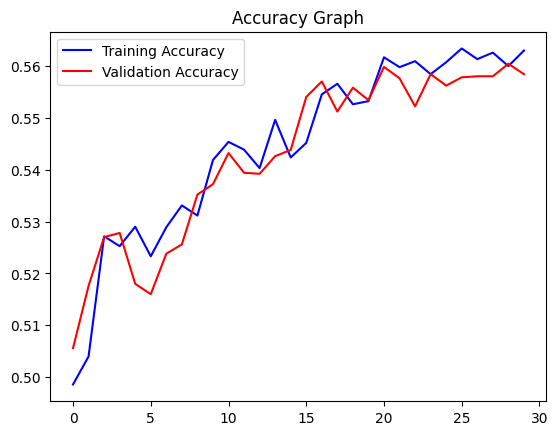

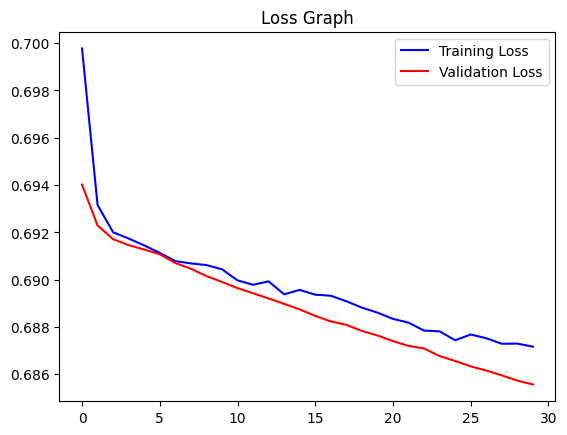

In [17]:
accu = history.history['accuracy']
val_accu = history.history['val_accuracy']
epochs = range(len(accu))

plt.plot(epochs, accu, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_accu, 'r', label = 'Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [18]:
model_json = model.to_json()
with open('catvsdogmodel.json', 'w') as json_file:
  json_file.write(model_json)
model.save_weights('catvsdogmodel.h5')

In [28]:
predictions = model.predict(valid_iterator, verbose=1)
predictions

10/10 [==============================] - 41s 4s/step


array([[0.51845783],
       [0.5137386 ],
       [0.49507043],
       ...,
       [0.51112723],
       [0.4582282 ],
       [0.5487938 ]], dtype=float32)

In [19]:
#Test the Model
scores = model.evaluate(valid_iterator, batch_size= 32, verbose= 1)
print("\n Test result: %.3f loss: %.3f" %(scores[1]*100, scores[0]))

10/10 [==============================] - 41s 4s/step - loss: 0.6856 - accuracy: 0.5584

 Test result: 55.840 loss: 0.686


In [ ]:
y_true = valid_iterator.labels
y_true

In [31]:
from sklearn.metrics import accuracy_score
y_pred = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.38%


In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Function to preprocess a single image
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to predict single image
# def predict_single_image(model, image_path, target_size=(128, 128)):
#     processed_image = preprocess_image(image_path, target_size)
#     prediction = model.predict(processed_image)
#     print(prediction)
#     if prediction[0, 0] > 0.5:  # Assuming binary classification
#         return "Dog"
#     else:
#         return "Cat"

def predict_images(model, image_paths, target_size=(128, 128)):
    if isinstance(image_paths, str):  # If a single image path is provided
        image_paths = [image_paths]

    predictions = []
    for image_path in image_paths:
        processed_image = preprocess_image(image_path, target_size)
        prediction = model.predict(processed_image)

        if prediction[0, 0] > 0.5:  # Assuming binary classification
            predictions.append("Cat")
        else:
            predictions.append("Dog")

    return predictions

# Example usage
# image_path = "/content/dog.jpg"
# prediction_result = predict_images(model, image_path)
# print("Prediction for", image_path, ":", prediction_result)

image_paths = ["/content/dog.jpg", "/content/cat2.jpg", "/content/cat.jpg"]
predictions = predict_images(model, image_paths)

for image_path, prediction in zip(image_paths, predictions):
    print(f"Image: {image_path} - Prediction: {prediction}")


1/1 [==============================] - 0s 37ms/step
Image: /content/dog.jpg - Prediction: Dog
Image: /content/cat2.jpg - Prediction: Cat
Image: /content/cat.jpg - Prediction: Cat
